In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

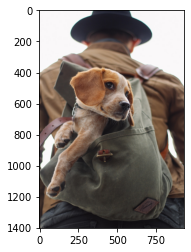

In [70]:
img1=cv2.imread('C://Users//Muhammad junaid//Downloads//dog_backpack.jpg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread('C://Users//Muhammad junaid//Downloads//watermark_no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img1)


In [7]:
#blended image of different size using the concept mask
img2=cv2.resize(img2,(600,600))

In [71]:
x_offset=943-600
y_offset=1401-600

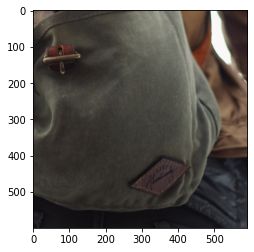

In [74]:
ROI=img1[y_offset:1401,x_offset:943]
plt.imshow(ROI)

In [77]:
#if you want to make your region of interest then first you select the start point (x_axi,y_axis) and for that if have to go towards x_axis
#and then move towards y_axis 
ROI.shape

(600, 591, 3)

In [78]:
#next step is to creat a mask the mask allow us to only grab the red portion of the don't copy

In [79]:
#make gray  scale image
img2gray=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

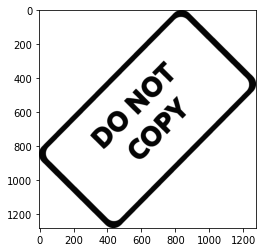

In [80]:
plt.imshow(img2gray,cmap='gray')

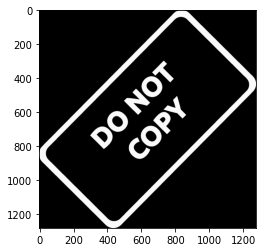

In [81]:
#bitwise_not actually convert black into white and white into black
mask_inv=cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')
#mask_inv is not a color channel anymore it has not channal there for we want to add the color channal so that the two are comportabile

In [82]:
#the full function will take the shape of the array and then what you want it to be full of.
#keep that the dtype of this is same as to mask which are basically integer
white_background=np.full(img2.shape,255,dtype=np.uint8)

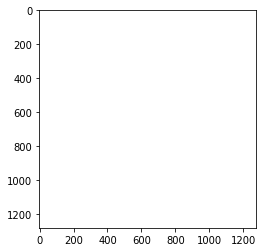

In [83]:
plt.imshow(white_background) 

In [84]:
#bitwise_or is actually grabbed these two white_background and put the mask on top of that simply we have created the white_background
#for the three color and put the mask on top of that.here every single color channal have ( don't copy)
bk=cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [85]:
#this actually still white i want to replace this is on original image which is red it will replace the mask on the all 3 chnl in imag2.
fg=cv2.bitwise_or(img2,img2,mask=mask_inv)

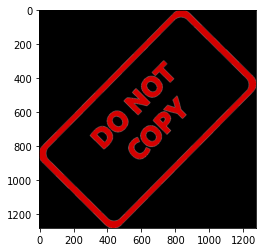

In [86]:
plt.imshow(fg)
#we have this original color we will only select the don't copy words and eliminting the other parts

In [87]:
final_img=cv2.bitwise_or(ROI,fg)
plt.imshow(final_img)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'
